# Imports

In [ ]:
!pip install -qU fastcore fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00


In [ ]:
# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

import os
from fastai.vision.all import *
import torch
import random

# Setup

Assuming provided files are present. Installing fastai (may need to restart runtime)

In [ ]:
import fastai
fastai.__version__

'2.7.14'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data and put in dataloaders

In [ ]:
# Set the seed value all over the place to make this reproducible.
seed  = 42

def seed_value(SEED):
    random.seed(seed)
#     np.random.seed(save_model)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
seed_value(42)

In [ ]:
# # crop the images and save in data_crop folder
# # get all the filenames
# all_files = []
# data = '/content/drive/MyDrive/challenge/all_data'
# for path, subdirs, files in os.walk(data):
#     for name in files:
#         all_files.append(os.path.join(path, name))

# for f in all_files:
#     temp_img = Image.open(f)

#     # Croped 190 pixcel from top /230 pixcel from bottom

#     temp_img = temp_img.crop((0, 190, 800, 600-230))
#     temp_img.save('/content/drive/MyDrive/challenge/datacropped' + f.split(data)[1])

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/challenge/train_ids_labels csv.csv')
print(train.shape)
train.head(2)

(4026, 2)


,Image_ID,Label
0,cVOfkSdqnWXUerr,0
1,EhnvIDPXFFjUhkR,0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/challenge/test_ids_only.csv')
print(test.shape)
test.head(2)

(1650, 1)


,Image_ID
0,nRhHxqLhDlJsiXc
1,gbSntVovxgHQrmO


In [ ]:
# Add the image filenames (will be useful)
train['fn'] ='/content/drive/MyDrive/challenge/datacropped/'+ train['Image_ID']
test['fn'] = 'content/drive/MyDrive/challenge/datacropped/'+test['Image_ID']

In [ ]:
train['fn']

0       /content/drive/MyDrive/challenge/datacropped/cVOfkSdqnWXUerr
1       /content/drive/MyDrive/challenge/datacropped/EhnvIDPXFFjUhkR
2       /content/drive/MyDrive/challenge/datacropped/tYKqoStvHsryFhS
3       /content/drive/MyDrive/challenge/datacropped/eSpjlsZIwOMLmUS
4       /content/drive/MyDrive/challenge/datacropped/uzxhIXjNENLyHwZ
                                    ...                             
4021    /content/drive/MyDrive/challenge/datacropped/HPmIRNZNYnJGtHp
4022    /content/drive/MyDrive/challenge/datacropped/tXgGJzdKiOuKOZZ
4023    /content/drive/MyDrive/challenge/datacropped/bJNJEzeYfmPTZrm
4024    /content/drive/MyDrive/challenge/datacropped/dYyArLoquZIFCTh
4025    /content/drive/MyDrive/challenge/datacropped/ktbwKIdUOjwbFOd
Name: fn, Length: 4026, dtype: object

# class distribution

<Axes: >

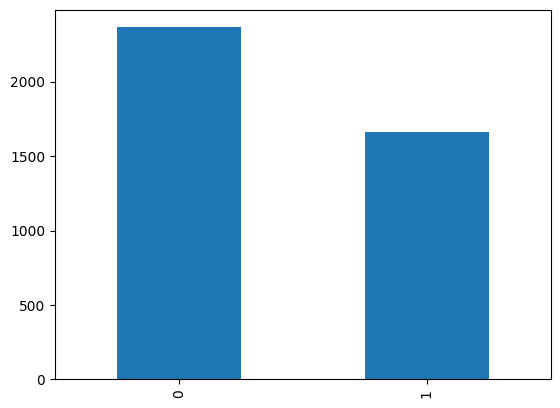

In [ ]:
train['Label'].value_counts().plot.bar()

In [ ]:
print(train['fn'].head())


0    /content/drive/MyDrive/challenge/datacropped/cVOfkSdqnWXUerr
1    /content/drive/MyDrive/challenge/datacropped/EhnvIDPXFFjUhkR
2    /content/drive/MyDrive/challenge/datacropped/tYKqoStvHsryFhS
3    /content/drive/MyDrive/challenge/datacropped/eSpjlsZIwOMLmUS
4    /content/drive/MyDrive/challenge/datacropped/uzxhIXjNENLyHwZ
Name: fn, dtype: object


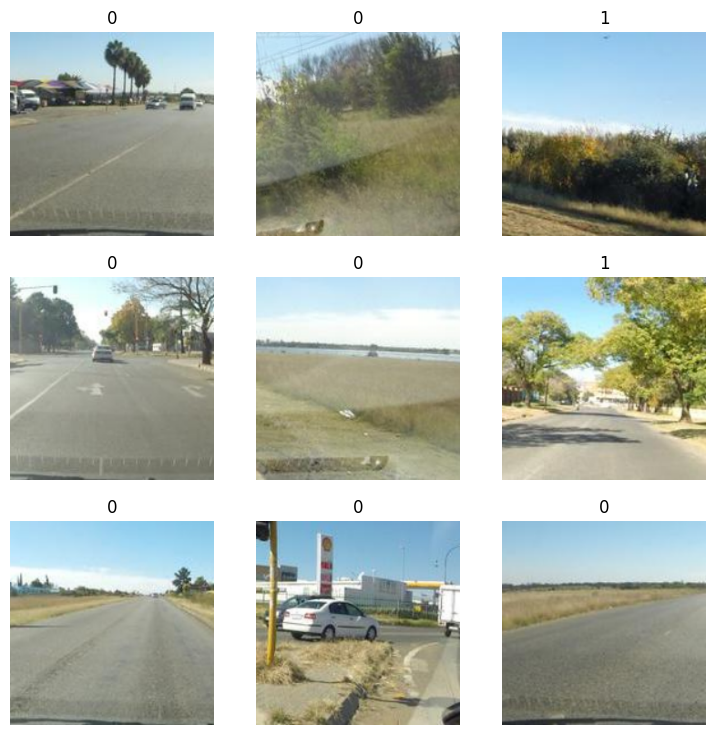

In [ ]:
# Data augmentation
augmentations = [
    Rotate(p=0.5,draw=90), Rotate(p=0.5,draw=-90), Rotate(p=0.5,draw=-30), Rotate(p=0.5,draw=30), Rotate(p=0.5,draw=-15), Rotate(p=0.5,draw=15), Rotate(p=0.5,draw=-10),
    Rotate(p=0.5,draw=10), Flip(p=1),
    ]
# Path to the folder containing the images
path = Path("/content/drive/MyDrive/challenge/datacropped/")

# Define a function to get the path of the image file based on Image_ID
def get_image_path(row):
    return path / f"{row['Image_ID']}.jpg"

# Add a new column to the DataFrames with the file path
train['path'] = train.apply(get_image_path, axis=1)
test['path'] = test.apply(get_image_path, axis=1)

# Create DataLoaders using ImageDataLoaders.from_df
dls = ImageDataLoaders.from_df(train,batch_tfms=augmentations, path=path,
                                label_col='Label',suff='.JPG', item_tfms=Resize(224))
dls.show_batch()

# Quick Model



In [ ]:
learn = cnn_learner(dls, models.densenet121, metrics=[error_rate,accuracy,], pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 108MB/s]


In [ ]:
save_callback = SaveModelCallback(monitor='valid_loss', fname='/content/drive/MyDrive/challenge/models2')


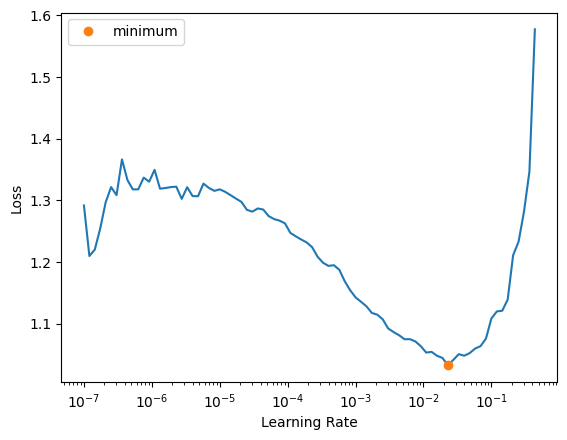

In [ ]:
m = learn.lr_find(suggest_funcs=(minimum))
epochs = 10
m = m.minimum

In [ ]:
learn.fit_one_cycle(epochs, slice(m/10, m),cbs=save_callback)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.910555,0.432903,0.198758,0.801242,07:05
1,0.711994,0.387394,0.132919,0.867081,00:35
2,0.581037,0.305775,0.122981,0.877019,00:35
3,0.466647,0.281992,0.110559,0.889441,00:35
4,0.388347,0.201155,0.084472,0.915528,00:34
5,0.342048,0.176366,0.073292,0.926708,00:35
6,0.300664,0.174486,0.062112,0.937888,00:34
7,0.284012,0.171241,0.067081,0.932919,00:35
8,0.270822,0.163140,0.062112,0.937888,00:34
9,0.253626,0.162487,0.062112,0.937888,00:35


Better model found at epoch 0 with valid_loss value: 0.43290257453918457.
Better model found at epoch 1 with valid_loss value: 0.3873940706253052.
Better model found at epoch 2 with valid_loss value: 0.30577459931373596.
Better model found at epoch 3 with valid_loss value: 0.281991571187973.
Better model found at epoch 4 with valid_loss value: 0.20115502178668976.
Better model found at epoch 5 with valid_loss value: 0.17636632919311523.
Better model found at epoch 6 with valid_loss value: 0.1744862049818039.
Better model found at epoch 7 with valid_loss value: 0.1712406724691391.
Better model found at epoch 8 with valid_loss value: 0.1631399393081665.
Better model found at epoch 9 with valid_loss value: 0.1624869555234909.


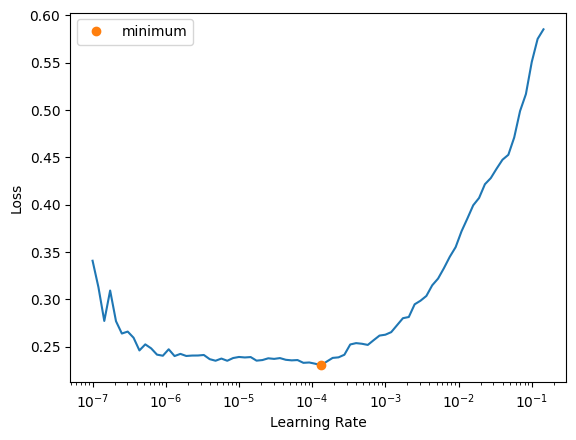

In [ ]:
learn.unfreeze()
m = learn.lr_find(suggest_funcs=(minimum))
m = m.minimum

In [ ]:
learn.fit_one_cycle(epochs, slice(m/10, m),cbs=save_callback)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.257303,0.163954,0.058385,0.941615,00:42
1,0.246411,0.161904,0.062112,0.937888,00:43
2,0.244423,0.160674,0.060870,0.939130,00:44
3,0.241020,0.158340,0.062112,0.937888,00:42
4,0.243512,0.156939,0.063354,0.936646,00:42
5,0.242531,0.155400,0.062112,0.937888,00:42
6,0.246801,0.155054,0.062112,0.937888,00:41
7,0.241640,0.154903,0.060870,0.939130,00:41
8,0.235269,0.156176,0.059627,0.940373,00:42
9,0.240717,0.154493,0.059627,0.940373,00:41


Better model found at epoch 0 with valid_loss value: 0.1639542132616043.
Better model found at epoch 1 with valid_loss value: 0.16190405189990997.
Better model found at epoch 2 with valid_loss value: 0.16067449748516083.
Better model found at epoch 3 with valid_loss value: 0.1583397090435028.
Better model found at epoch 4 with valid_loss value: 0.1569388061761856.
Better model found at epoch 5 with valid_loss value: 0.15540023148059845.
Better model found at epoch 6 with valid_loss value: 0.15505364537239075.
Better model found at epoch 7 with valid_loss value: 0.15490253269672394.
Better model found at epoch 9 with valid_loss value: 0.15449292957782745.


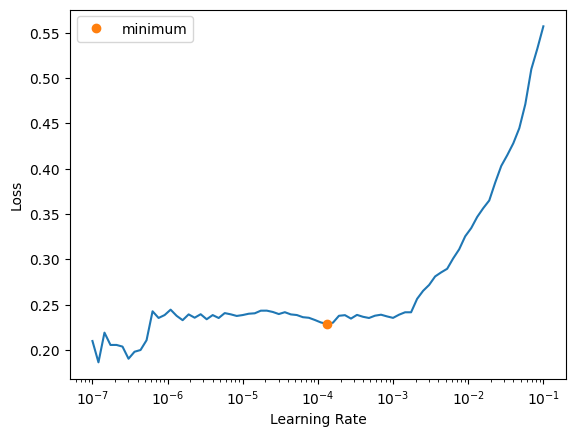

In [ ]:
learn.unfreeze()
m = learn.lr_find(suggest_funcs=(minimum))
m = m.minimum

In [ ]:
learn.fit_one_cycle(5, slice(m/10, m),cbs=save_callback)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.247606,0.154600,0.060870,0.939130,00:42
1,0.239668,0.151054,0.060870,0.939130,00:43
2,0.241095,0.152292,0.062112,0.937888,00:43
3,0.228906,0.149894,0.059627,0.940373,00:42
4,0.230131,0.150328,0.059627,0.940373,00:42


Better model found at epoch 0 with valid_loss value: 0.15459966659545898.
Better model found at epoch 1 with valid_loss value: 0.15105433762073517.
Better model found at epoch 3 with valid_loss value: 0.1498936265707016.


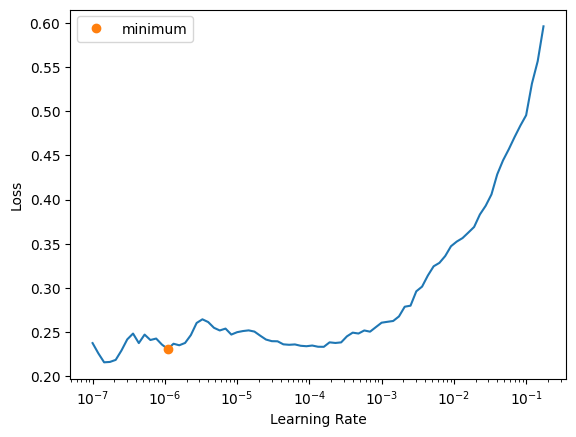

In [ ]:
learn.unfreeze()
m = learn.lr_find(suggest_funcs=(minimum))
m = m.minimum

In [ ]:
learn.fit_one_cycle(5, slice(m/10, m),cbs=save_callback)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.210142,0.151061,0.060870,0.939130,00:42
1,0.215652,0.149981,0.058385,0.941615,00:42
2,0.234152,0.151085,0.059627,0.940373,00:42
3,0.228534,0.149917,0.059627,0.940373,00:41
4,0.230690,0.151020,0.063354,0.936646,00:41


Better model found at epoch 0 with valid_loss value: 0.1510610282421112.
Better model found at epoch 1 with valid_loss value: 0.14998143911361694.
Better model found at epoch 3 with valid_loss value: 0.14991748332977295.


In [ ]:
preds, targets =learn.get_preds(dl=dls.valid)
# Step 2: Convertir les prédictions en classes prédites
pred_classes = preds.argmax(dim=1)

# Step 3: Calculer l'accuracy
accuracy = (pred_classes == targets).float().mean()

print(f"Accuracy: {accuracy.item() * 100:.2f}%")

Accuracy: 94.04%


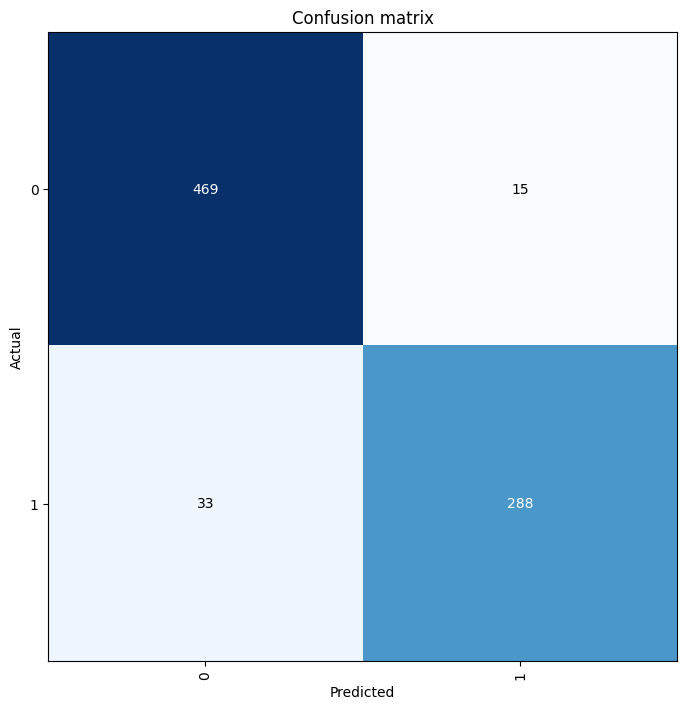

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(7, 7), dpi=100)

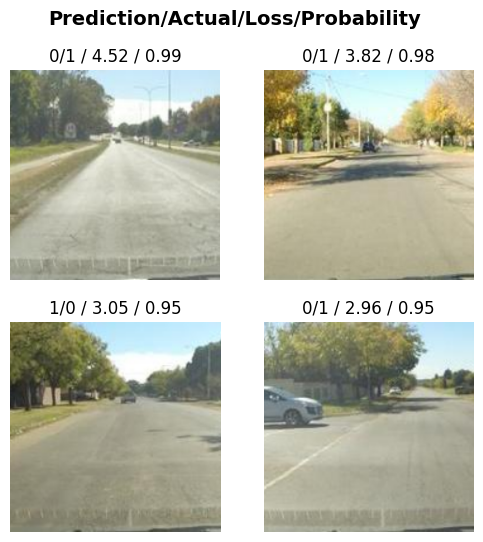

In [ ]:
interp.plot_top_losses(4)

In [ ]:
resnt18=learn.get_preds(dl=dls.valid)

In [ ]:
model = models.densenet121()
checkpoint = torch.load('/content/drive/MyDrive/challenge/models2.pth')  # Use 'cpu' if you're not using GPU
model.load_state_dict(checkpoint)



# Submission

In [ ]:
preds = learn.get_preds(dl=dls.test_dl(test)) # Getting the predicted probabilities

In [ ]:
submission = pd.DataFrame()
submission["Image_ID"] = test["Image_ID"]
submission[["test","Label"]]= np.array(preds[0])
submission = submission.drop(columns ="test")
submission.head(15)

In [ ]:
submission.to_csv('sub.csv', index=False)
submission.to_csv('/content/drive/MyDrive/challenge/sub.csv', index=False)